In [2]:
import pandas as pd
import numpy as np
# df = pandas.read_csv('data/stability/stability_foldx_deduplicate_af2.csv')
# df_sample = df.sample(frac=0.05)
# df_sample.to_csv('data/stability/base_seq.csv', index=False)
df = pd.read_csv('data/stability/stability_foldx_deduplicate_af2.csv')
targets = df['target'].tolist()
print(len(targets))
print(np.mean(targets), np.median(targets), np.std(targets), np.max(targets), np.min(targets))

51715
6.937420653990029 5.13316 6.097257342023598 68.6938 -6.57776


In [2]:
import pandas as pd

def percentage_rank(nums, t):
    sorted_nums = sorted(nums)
    count = len(sorted_nums)
    
    if count == 0:
        return None  # Return None if the list is empty
    
    for i, num in enumerate(sorted_nums):
        if num >= t:
            return (i / count) * 100
    
    return 100

df = pd.read_csv('data/GFP/GFP_ground_truth_deduplicate.csv')
print(len(df))
ground_truth = df['target'].tolist()
print(percentage_rank(ground_truth, 0.885))

51715
0.0


In [8]:
df = pd.read_csv('logs/train_smooth_stability_2023_09_11__14_44_27/samples/seed_1.csv')
source_scores = df['source_scores'].values
mutant_scores = df['mutant_scores'].values
print(len(source_scores), len(mutant_scores))
print(np.mean(source_scores), np.median(source_scores), np.std(source_scores), np.max(source_scores), np.min(source_scores))
print(np.mean(mutant_scores), np.median(mutant_scores), np.std(mutant_scores), np.max(mutant_scores), np.min(mutant_scores))
(source_scores < mutant_scores).sum()

6030 6030
-6.033896246386899 -5.209601163864136 6.109821230206091 8.930315971374512 -33.99614334106445
-4.8911519326788575 -4.492574214935303 5.077473911936948 8.930315971374512 -24.50808334350586


4332

In [12]:
df = pd.read_csv('logs/train_smooth_stability_2023_09_11__14_44_27/samples_20230913-144759/foldx_results.csv')
scores = df['ddg'].values
gt_csv = pd.read_csv('data/stability/base_seq.csv')
gt_scores = gt_csv['target'].values
print(np.mean(scores), np.median(scores), np.std(scores))
print(np.mean(gt_scores), np.median(gt_scores), np.std(gt_scores))

12.4387431953125 10.735 7.116190567531272
7.047552078538283 5.109565 6.365921413549166


In [1]:
x = 'abcd'
y = 'abde'
mut_site_indices = [i for i, aa in enumerate(y) if aa!= x[i]]
mut_site_indices

[2, 3]

In [1]:
import pandas as pd

sampled_data = pd.read_csv('logs/train_predictor_stability_2023_09_14__11_28_34_augment/samples_20230914-114542/foldx_results.csv')
sampleds_seqs = set(sampled_data['sequence'].tolist())
gt_data = pd.read_csv('data/stability/stability_foldx_deduplicate_af2.csv')
gt_seqs = set(gt_data['sequence'].tolist())

print(len(sampleds_seqs.intersection(gt_seqs)))

0


In [1]:
import pandas as pd

df = pd.read_csv('logs/GWG_2_2023_09_20__09_52_33_pareto/samples_20230920-095233/seed_1.csv')
df['source_scores'] = df['source_scores_1']
df['mutant_scores'] = df['mutant_scores_1']
df.to_csv('logs/GWG_2_2023_09_20__09_52_33_pareto/samples_20230920-095233/seed_1_fill_stability.csv')
df['source_scores'] = df['source_scores_2']
df['mutant_scores'] = df['mutant_scores_2']
df.to_csv('logs/GWG_2_2023_09_20__09_52_33_pareto/samples_20230920-095233/seed_1_fill_GFP.csv')

In [6]:
df['source_scores'] = df['source_scores_2']
df['mutant_scores'] = df['mutant_scores_2']

In [7]:
df

,source_sequences,mutant_sequences,source_scores,mutant_scores,epoch,mutant_scores_1,mutant_scores_2,source_scores_1,source_scores_2
0,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDTTYGKLTLKFI...,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDTTYGKLTLKFI...,0.794316,0.703079,1.0,-21.623791,0.703079,-25.918085,0.794316
1,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDTTYRKLTLKFI...,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDTTYGKLTLKFI...,0.747767,0.910946,1.0,-8.761676,0.910946,-16.878666,0.747767
2,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDTTYGKLTLKFT...,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDTTYGKLTLKFT...,0.764884,0.900708,1.0,-17.847965,0.900708,-25.913685,0.764884
3,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,0.975110,0.805776,1.0,-17.901964,0.805776,-27.369392,0.975110
4,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,0.826322,0.815473,1.0,-10.890280,0.815473,-20.575684,0.826322
...,...,...,...,...,...,...,...,...,...
5885,SKGEELFTGVVPILVELDGDVNGHKFRVSGEGEGDATYGKLTLKFI...,SKGEELFTGVVPILVELDGDVNGHKFRVSGEGEGDATYGKLTLKFI...,1.336768,1.494279,15.0,0.285738,1.494279,-1.182695,1.336768
5886,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,1.480218,1.418220,15.0,1.127262,1.418220,0.788330,1.480218
5887,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATMGKLTLKFI...,SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATMGKLTLKFI...,1.286124,1.354572,15.0,0.140837,1.354572,-0.914065,1.286124
5888,SKGEELFTGAVPILVKLDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,SKGEELFTGAVPILVKLDGDVNGHKFSVSGEGEGDATYGKLTLKFI...,1.650462,1.425997,15.0,-2.681090,1.425997,-1.405253,1.650462


In [8]:
df.to_csv('logs/GWG_2_2023_09_19__11_40_04/samples_20230919-114004/seed_1_fillin_2_GFP.csv')

In [8]:
import torch

ckpt = torch.load('logs/oracle_GFP_ggs/checkpoints/best_checkpoints.pt')
print(ckpt.keys())
# keys = list(ckpt.keys())
# for key in keys:
#     ckpt[key[10:]] = ckpt.pop(key)
# print(ckpt.keys())
# state_dict = ckpt['state_dict']
# torch.save(ckpt, 'logs/oracle_GFP_ggs/checkpoints/best_checkpoints.pt')

dict_keys(['encoder.weight', 'encoder.bias', 'embedding.layer.weight', 'embedding.layer.bias', 'decoder.weight', 'decoder.bias'])


In [10]:
import json
with open('data/foldx/cache.json') as f:
    a = json.load(f)
print(a, type(a))

{} <class 'dict'>


In [11]:
from pymoo.indicators.hv import HV
import numpy as np
from pymoo.problems import get_problem
from pymoo.visualization.scatter import Scatter

# The pareto front of a scaled zdt1 problem
pf = get_problem("zdt1").pareto_front()

# The result found by an algorithm
A = pf
print(A.shape)
# print(A)

ref_point = np.array([1.2, 1.2])

ind = HV(ref_point=ref_point)
print("HV", ind(A))
print("HV", ind(A * 10))

(100, 2)
HV 1.101409368920674
HV 0.0


In [6]:
import pandas as pd

df_GFP = pd.read_csv('data/GFP/GFP_ground_truth_deduplicate.csv')
df_stability = pd.read_csv('data/stability/stability_foldx_deduplicate_af2.csv')
seqs_GFP = df_GFP['sequence'].tolist()
seqs_stability = df_stability['sequence'].tolist()
scores_GFP = df_GFP['target'].tolist()
scores_stability = df_stability['target'].tolist()
df = pd.DataFrame({'sequence': seqs_GFP, 
                   'GFP': scores_GFP,
                   'stability': scores_stability})
df.to_csv('data/ground_truth_GFP_stability.csv', index=False)

In [7]:
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'seq': ['seq1', 'seq2', 'seq3', 'seq4'],
    'GFP': [1.5, -0.5, -1.5, 2.0],
    'stability': [0.5, 1.5, 2.5, 0.5]
})

# Filtering rows
filtered_df = df[(df['GFP'] < 0) & (df['stability'] > 1)]

print(filtered_df)


    seq  GFP  stability
1  seq2 -0.5        1.5
2  seq3 -1.5        2.5


In [12]:
import os

def foldx_runner(batch_idx, pdb_dir, pdb_file, mut_file, out_dir, num_runs=5):
    cmd = f'FoldX --command=BuildModel --pdb-dir={pdb_dir} --pdb={pdb_file} --output-dir={out_dir} --mutant-file={mut_file} --numberOfRuns={num_runs} --out-pdb=false --output-file=batch_{batch_idx}'
    # os.system(cmd)
    print(cmd)

batch_idx = 2
foldx_runner(batch_idx, 'data/foldx/outputs_af2', 'ref_seq_af2_Repair.pdb', f'tmp_foldx/tmp_2023-09-21_14-05-19/individual_list/individual_list_{batch_idx}.txt', 'tmp_foldx/tmp_2023-09-21_13-48-29', 2)

FoldX --command=BuildModel --pdb-dir=data/foldx/outputs_af2 --pdb=ref_seq_af2_Repair.pdb --output-dir=tmp_foldx/tmp_2023-09-21_13-48-29 --mutant-file=tmp_foldx/tmp_2023-09-21_14-05-19/individual_list/individual_list_2.txt --numberOfRuns=2 --out-pdb=false --output-file=batch_2


In [2]:
import json

with open('data/all_seqs_list.json') as f:
    all_seqs_list = json.load(f)
print(len(all_seqs_list), len(all_seqs_list[0]))

196762 237


In [4]:
from Bio import SeqIO

records = SeqIO.parse('data/foldx/GFP_reference_seq_aa.fasta', 'fasta')
ref_seq = str(next(records).seq)
print(ref_seq, len(ref_seq))

SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTFSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK 237


In [7]:
def sequence_differences(seq1, seq2):
    if len(seq1) != len(seq2):
        raise ValueError("Both sequences must be of the same length.")
    
    differences = []
    for i, (s1, s2) in enumerate(zip(seq1, seq2)):
        if s1 != s2:
            differences.append(f"{s1}{i+1}{s2}")
    
    differences = ';'.join(differences)
    
    return differences

all_seqs_difference = [sequence_differences(ref_seq, seq) for seq in all_seqs_list]
print(all_seqs_difference[:10], len(all_seqs_difference))

['E16G;V28M;F63L;S64P;C69R;M77D;D81G;R95G;K106Q;D116G;I127H;N158D;N184D;H216R;L235P', 'F26L;F63L;Q68R;P74T;D128E;N158D;N197D', 'A36V;K44A;T49C;F63L;K130R;M152K;L193Q;M217T', 'F26K;F45T;F63L;D196V;S204F', 'D18G;F26L;L41K;F63L;D81G;F98M;K112M', 'K40R;F45L;F63L;Y73C;F83L;M87L;K112P;V162A;H198K;G227R', 'K25E;L43G;F63L;F70S;T107A;K112M;E114A;Y181N;D189G;N211H', 'F7S;S29P;F63L;D101W;H198M;E221G', 'D18A;F63L;T96A;F98L;R108N;A109V;K139E;M152T;K155R;D172G;E221G', 'G23D;K51E;F63L;H80R;I135V;L140R'] 196762


In [9]:
import pandas as pd
from tqdm.auto import tqdm

starting = pd.read_csv('data/GFP_stability_percentile_0.4.csv').sequence.tolist()
is_starting = [int(seq in starting) for seq in tqdm(all_seqs_list)]
print(sum(is_starting))
df = pd.DataFrame({'mutants': all_seqs_difference,
                   'seq': all_seqs_list, 
                   'starting': is_starting})
df.to_csv('data/GFP_stability_percentile_0.4_mutants.csv', index=False)

1721


(256,) (256,)
0.9997440325377546


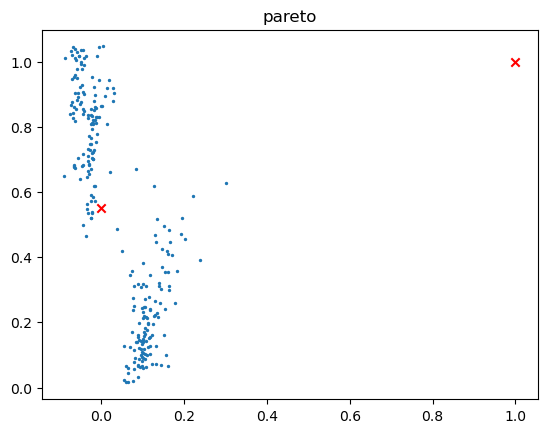

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from utils.eval import calc_hypervolume
import numpy as np
wt_GFP = 2.555
wt_GFP_normalized = 0.448
df = pd.read_csv('logs/GWG_2_2023_09_21__13_20_28_pareto/samples_20230921-132028/evaluation_results_2topk.csv')
scores1 = df['stability_normalized'].values
scores2 = 1 - df['GFP_normalized'].values
# scores1 = np.clip(scores1, 0, 1)
# scores2 = np.clip(scores2, 0, 1)
print(scores1.shape, scores2.shape)

r1, r2 = 1.0, 1.0
hv = calc_hypervolume(scores1, scores2, r1, r2)
print(hv)
plt.scatter(scores1, scores2, s=2)
plt.scatter([r1], [r2], c='r', marker='x')
plt.scatter([0], [1 - wt_GFP_normalized], c='r', marker='x')
plt.title('pareto')
plt.show()

In [20]:
print(calc_hypervolume([0, 0.5], [0.5, 0], 1, 1))

0.75


In [1]:
"SKGEELFTGVVPILVGLDGDVNGHKFSMSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLPYGVQRFSRYPDHDKQHGFFKSAMPEGYVQEGTIFFKDDGNYQTRAEVKFEGGTLVNRIELKGHDFKEDGNILGHKLEYNYNSHNVYIMADKQKDGIKVNFKIRHNIEDGSVQLADHYQQDTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDRMVLLEFVTAAGITHGMDEPYK" == "SKGEELFTGVVPILVGLDGDVNGHKFSMSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLPYGVQRFSRYPDHDKQHGFFKSAMPEGYVQEGTIFFKDDGNYQTRAEVKFEGGTLVNRIELKGHDFKEDGNILGHKLEYNYNSHNVYIMADKQKDGIKVNFKIRHNIEDGSVQLADHYQQDTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDRMVLLEFVTAAGITHGMDEPYK"

True

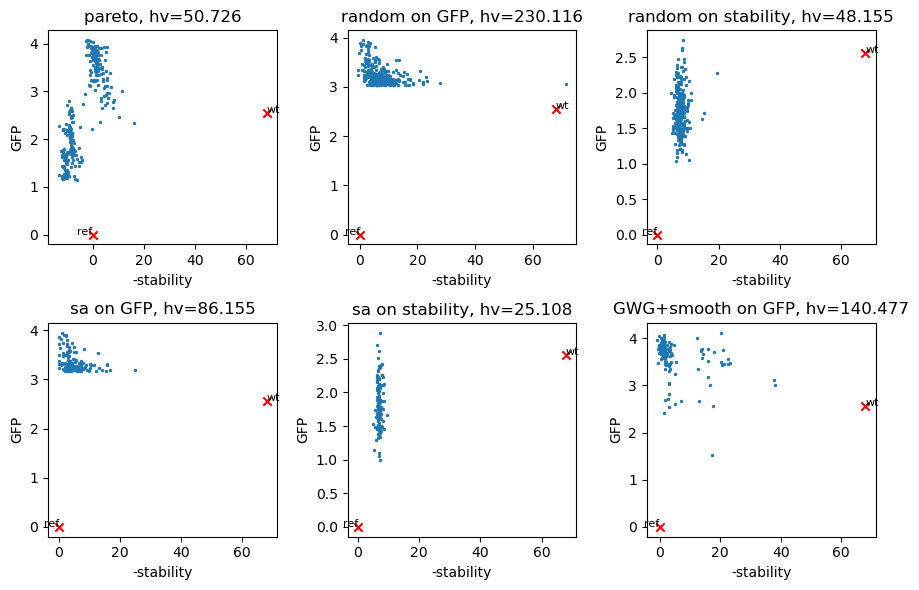

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from utils.eval import calc_hypervolume

wt_GFP = 2.555
wt_GFP_normalized = 0.448

def draw_scatter_plot(csv_path, axs, title):
    df = pd.read_csv(csv_path)
    scores1 = df['stability'].values
    scores2 = df['GFP'].values
    # scores1 = np.clip(scores1, 0, 1)
    # scores2 = np.clip(scores2, 0, 1)
    # print(scores1.shape, scores2.shape)

    r1, r2 = 0, 0
    hv = calc_hypervolume(-scores1, -scores2, r1, r2)
    # print(hv)
    axs.scatter(scores1, scores2, s=2)
    axs.scatter([r1], [r2], c='r', marker='x')
    axs.text(r1, r2, 'ref', fontsize=8, ha='right')
    axs.scatter([68], [wt_GFP], c='r', marker='x')
    axs.text(68, wt_GFP, 'wt', fontsize=8, ha='left')
    axs.set_title(f'{title}, hv={hv:.3f}')
    axs.set_xlabel('-stability')
    axs.set_ylabel('GFP')
    
    return scores1.mean().item(), scores2.mean().item()

fig, axs = plt.subplots(2, 3, figsize=(9, 6))
avg_pts_x = []
avg_pts_y = []
legend = []
x, y = draw_scatter_plot('logs/GWG_2_2023_09_21__13_20_28_pareto/samples_20230921-132028/evaluation_results_2topk.csv', axs[0, 0], 'pareto')
avg_pts_x.append(x)
avg_pts_y.append(y)
legend.append('pareto')
x, y = draw_scatter_plot('logs_baseline/random_sample_GFP_2023_09_25__13_27_14_GFP/evaluation_results.csv', axs[0, 1], 'random on GFP')
avg_pts_x.append(x)
avg_pts_y.append(y)
legend.append('random on GFP')
x, y = draw_scatter_plot('logs_baseline/random_sample_stability_2023_09_25__14_16_39/evaluation_results.csv', axs[0, 2], 'random on stability')
avg_pts_x.append(x)
avg_pts_y.append(y)
legend.append('random on stability')
x, y = draw_scatter_plot('logs_baseline/simulated_annealing_GFP_2023_09_26__11_44_41/evaluation_results.csv', axs[1, 0], 'sa on GFP')
avg_pts_x.append(x)
avg_pts_y.append(y)
legend.append('sa on GFP')
x, y = draw_scatter_plot('logs_baseline/simulated_annealing_stability_2023_09_26__11_51_21/evaluation_results.csv', axs[1, 1], 'sa on stability')
avg_pts_x.append(x)
avg_pts_y.append(y)
legend.append('sa on stability')
x, y = draw_scatter_plot('logs/train_smooth_GFP_2023_09_21__17_01_05_agument/samples_20230921-194739/evaluation_results.csv', axs[1, 2], 'GWG+smooth on GFP')
avg_pts_x.append(x)
avg_pts_y.append(y)
legend.append('GWG+smooth on GFP')

plt.tight_layout()
plt.show()

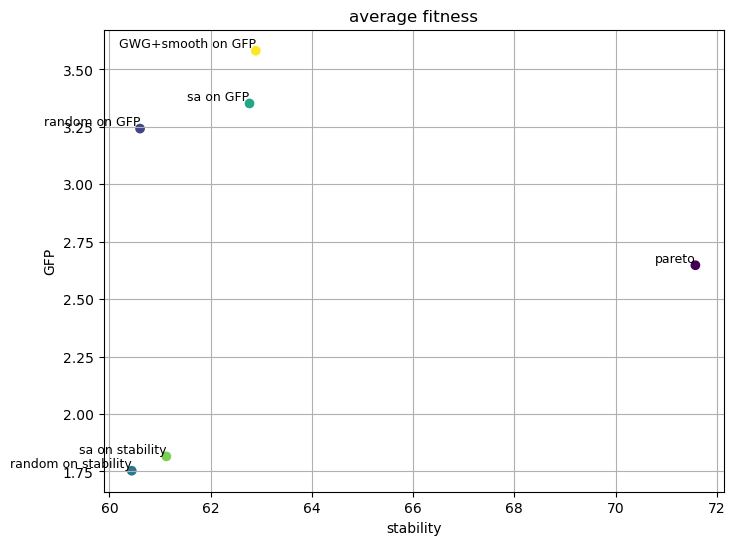

In [14]:
import numpy as np
plt.figure(figsize=(8, 6), dpi=100)
colors = plt.cm.viridis(np.linspace(0, 1, len(avg_pts_x)))
plt.scatter(avg_pts_x, avg_pts_y, color=colors)
for i, txt in enumerate(legend):
    plt.annotate(txt, (avg_pts_x[i], avg_pts_y[i]), fontsize=9, ha='right', va='bottom')
plt.xlabel('stability')
plt.ylabel('GFP')
plt.title('average fitness')

plt.grid(True)
plt.show()

In [2]:
import pandas as pd

gt_GFP_stability = pd.read_csv('data/ground_truth_GFP_stability_old.csv')
print(len(gt_GFP_stability))
print(gt_GFP_stability.head())
new_stability = pd.read_csv('data/stability/Stability_foldx_deduplicate_new.csv')
print(len(new_stability))
print(new_stability.head())
print(gt_GFP_stability['sequence'].tolist() == new_stability['sequence'].tolist())
gt_GFP_stability['stability'] = new_stability['target']
gt_GFP_stability.to_csv('data/ground_truth_GFP_stability.csv', index=False)

51715
                                            sequence       GFP  stability
0  SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...  3.726358   0.920074
1  SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...  1.301030   5.884890
2  SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...  1.301031   9.651140
3  SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...  1.301189  11.609100
4  SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...  3.708478   2.208300
51715
                                            sequence     target
0  SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...   0.920264
1  SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...   6.042830
2  SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...  10.210100
3  SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...  12.809400
4  SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFI...   2.212400
True


In [5]:
import pandas as pd
import numpy as np
data = pd.read_csv('data/GFP_stability_percentile_0.2_0.4.csv')
data.head()
stability = data['stability'].tolist()
print(np.mean(stability), np.median(stability), np.std(stability), np.max(stability), np.min(stability))
GFP = data['GFP'].tolist()
print(np.mean(GFP), np.median(GFP), np.std(GFP), np.max(GFP), np.min(GFP))

8.83916454889249 8.83554 1.2680385262459613 11.0905 6.60549
1.5171734332921394 1.5199353690000001 0.11860088947475589 1.746472478 1.303563833
